<a href="https://colab.research.google.com/github/BenShieh233/NLP-Text-Mining/blob/main/Freestyle_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package installation

In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('maxent_ne_chunker')

from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


In [2]:
!pip install keyphrase-vectorizers
!pip install trafilatura
!pip install summa
!pip install git+https://github.com/LIAAD/yake
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.8/837.8 KB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 KB 9.5 MB/s eta 0:00:00
 

In [3]:
from summa import keywords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
import spacy as sp
nlps = sp.load("en_core_web_sm")

In [5]:
# Yike
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 5

from yake import KeywordExtractor
kw_extractor = KeywordExtractor(lan=language, n=max_ngram_size, top=numOfKeywords,dedupLim=deduplication_threshold,dedupFunc=deduplication_algo, )

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
tw = pd.read_csv('/content/drive/MyDrive/INFOSYS765/cleaned_twitter_stocks.csv')

In [15]:
tw.columns = [col.lower() for col in tw.columns]

In [16]:
tw = tw[['tweet','stock', 'date']]
tw['date'] = pd.to_datetime(tw['date'], format='%d/%m/%Y')
tw['date'] = tw['date'].dt.strftime('%Y/%m/%d')
tw = tw.sort_values('date')
tw.head()

,tweet,stock,date
0,RT @robertoglezcano: @amazon #Patents Show Fl...,Amazon,2017/01/31
1226,RT @marthaperez0609: Broken Heart: Broken Piec...,Amazon,2017/01/31
1225,RT @pepsi: We’re on the right track 👶! #5days...,Pepsi,2017/01/31
1224,RT @HeatherMorrisTV: So proud of @Google @Star...,Google,2017/01/31
1223,#THEITCROWD ELTON JOHN T-SHIRT IRON ON VINTAGE...,eBay,2017/01/31


In [17]:
stopwords = nltk.corpus.stopwords.words('english')
wn = WordNetLemmatizer()

# Data preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+', '', text)
        
        # Remove hashtags
        text = re.sub(r'#\w+', '', text)

        # Remove hashtags
        text = re.sub(r'@\w+', '', text)

        # Replace line breaks with spaces
        text = text.replace("</br>", " ")

        # Lowercase the text
        text = text.lower()

        # Remove punctuation
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

        # Remove numbers
        text = re.sub(r'\d+', '', text)

        # Tokenize text
        tokens = word_tokenize(text)

        # Remove stopwords, lemmatize and drop words length < 2
        text = [wn.lemmatize(word) for word in tokens if word not in stopwords and len(word) > 2]

        return text
    else:
        return ''

In [18]:
def subset_dataset(comp):
  # Filter by the company name
  df = tw[tw['stock']==comp]
  df = df.reset_index().drop(columns='index') 
  df['tweet'] = df['tweet'].apply(lambda x: preprocess_text(x))
  df['keyphrase_1'] = df['tweet'].apply(lambda x: keywords.keywords(str(x)).split("\n"))
  df['keyphrase_2'] = df['tweet'].apply(lambda x: kw_extractor.extract_keywords(' '.join(x)))
  df['Spacy_person'] = df['tweet'].apply(lambda x: [tok for tok in nlps(' '.join(x)).ents if tok.label_ == 'PERSON'])
  df['Spacy_org'] = df['tweet'].apply(lambda x: [tok for tok in nlps(' '.join(x)).ents if tok.label_ == 'ORG']) 

  return df

In [19]:
amazon = subset_dataset('Amazon')

In [21]:
starbucks = subset_dataset('Starbucks')

In [22]:
nike = subset_dataset('Nike')

# Word Cloud for key phrases

In [23]:
def wordcloud(df, keyphrase):
  keyphrases = [keyphrase for sublist in df[keyphrase] for keyphrase in sublist]
  text = ' '.join(keyphrases)
  text = re.sub('amazon|nike|starbucks', '', text)

  # Create a wordcloud object with some customization options
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

  # Display the wordcloud image
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

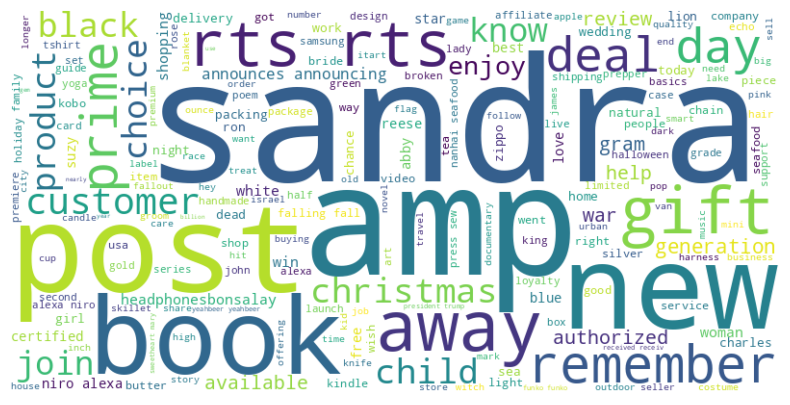

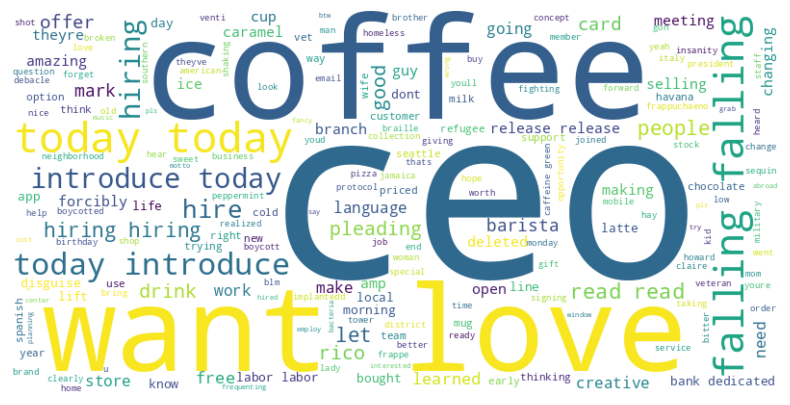

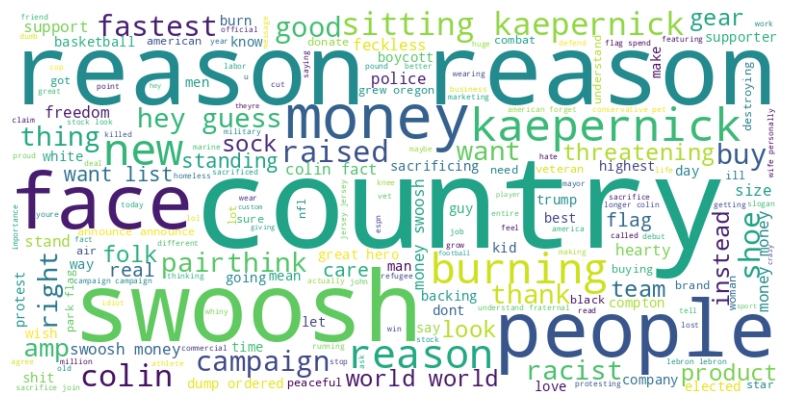

In [24]:
for df in [amazon, starbucks, nike]:
  wordcloud(df, 'keyphrase_1')

# Market Analysis

In [25]:
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
# amazon['Spacy_person'] = amazon['tweet'].apply(lambda x: [tok for tok in nlps(' '.join(x)).ents if tok.label_ == 'PERSON'])
# amazon['Spacy_org'] = amazon['tweet'].apply(lambda x: [tok for tok in nlps(' '.join(x)).ents if tok.label_ == 'ORG'])

In [26]:
name_counts = {}
org_counts = {}

def count_freq(df, n=4):
  global name_counts, org_counts

  name_counts = {}
  org_counts = {}

  # Concatenate all the names into a single list
  names = [keyphrase.text for sublist in df['Spacy_person'] for keyphrase in sublist]

  # Count the occurrences of each name
  name_counts = {}
  for name in names:
    if name in name_counts.keys():
      name_counts[name]+=1
    else:
      name_counts[name]=1

  name_counts = {name: count for name, count in name_counts.items() if count > n}


  # Concatenate all the organizations into a single list
  orgs = [keyphrase.text for sublist in df['Spacy_org'] for keyphrase in sublist]

  # Count the occurrences of each organization
  org_counts = {}
  for org in orgs:
    if org in org_counts.keys():
      org_counts[org]+=1
    else:
      org_counts[org]=1

  org_counts = {org: count for org, count in org_counts.items() if count > n}  

count_freq(nike)

In [27]:
name_set = set()
org_set = set()

def get_set():
  global name_set, org_set

  name_set = set()
  org_set = set()
  
  # Convert keys of name_counts dictionary to a set for efficient membership testing
  name_set = set(name_counts.keys())
  org_set = set(org_counts.keys())

# Define a function to check if any span in a list is in the name_set
def has_person(span_list):
    for span in span_list:
        if span.text in name_set:
            return True
    return False

# Define a function to check if any span in a list is in the org_set
def has_org(span_list):
    for span in span_list:
        if span.text in org_set:
            return True
    return False

get_set()

In [28]:
def flag(df, colname):
  if colname == 'Spacy_person':
    # Apply the has_person function to the Spacy_person column and create a boolean flag
    flag = df[colname].apply(has_person)
    filtered = df[flag]
    filtered[colname] = filtered[colname].apply(lambda x: [span.text for span in x]) # Extract the context from spacy.tokens.span.Span
    return filtered
  if colname == 'Spacy_org':
    # Apply the has_org function to the Spacy_org column and create a boolean flag
    flag = df[colname].apply(has_org)
    filtered = df[flag]
    filtered[colname] = filtered[colname].apply(lambda x: [span.text for span in x])
    return filtered
  else:
    return ("Error")

def freq_plot(df, colname):
  filtered_df = flag(df, colname)
  freq_df = filtered_df.explode(colname).groupby(['date', colname]).size().reset_index(name='count')
  fig = px.bar(freq_df, x='date', y='count', color=colname, title = f'Distribution of {colname} by Date')
  return fig

def total_freq_plot(df, colname):

  filtered_names = {k:v for k,v in name_counts.items()}
  filtered_orgs = {k:v for k,v in org_counts.items()}

  # Create the chart
  if colname == 'Spacy_person':
    fig = go.Figure(data=[go.Pie(labels=list(filtered_names.keys()), values=list(filtered_names.values()))])
  if colname == 'Spacy_org':
    fig = go.Figure(data=[go.Pie(labels=list(filtered_orgs.keys()), values=list(filtered_orgs.values()))])
  # Set the chart title and layout

  fig.update_layout(title=f'Total Counts of {colname}', showlegend=True)

  # Display the chart
  return fig

In [29]:
def display(df):
  for col in ['Spacy_person','Spacy_org']:
    freq_plot(df, col).show()
    total_freq_plot(df, col).show()

In [ ]:
display(nike)

<ipython-input-138-7770a96abd8b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-138-7770a96abd8b>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
# Display all the companies' data
for comp in [amazon, starbucks, nike]:
  count_freq(comp)
  get_set()
  display(comp)

<ipython-input-28-7770a96abd8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[colname] = filtered[colname].apply(lambda x: [span.text for span in x]) # Extract the context from spacy.tokens.span.Span


<ipython-input-28-7770a96abd8b>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-28-7770a96abd8b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-28-7770a96abd8b>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-28-7770a96abd8b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-28-7770a96abd8b>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

